# start_pakistan_correlations
## HW_plotTriggers.ipynb
This script plots the triggers for the Pakistan heatwave locations by year for 2004-2022. This uses data of a record of triggers / activations based on exceedance of the 2mT thresholds, which was calculated with the code 'HW_calcTriggers.ipynb'.

In [1]:
from pathlib import Path
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Set the root path
rootPath = Path('C:/Users/alexa/Documents/02_work/02_start/02_deliv/05_pk_correlation/hw/data')

## Load the triggers by year data

In [60]:
triggerYears = pd.read_csv(rootPath/'city_triggers/triggerYears.csv')

In [61]:
triggerYears.index = triggerYears.year
triggerYears = triggerYears.drop('year',axis=1)

In [62]:
triggerYears

,Jacobabad,Karachi_Jinnah_Airport,Lahore,Multan,Nawabshah,Sibi
year,,,,,,
2004,0.0,0.0,0.0,0.0,0.0,0.0
2005,0.0,1.0,1.0,1.0,0.0,0.0
2006,1.0,0.0,0.0,0.0,0.0,0.0
2007,0.0,1.0,1.0,1.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0
2009,1.0,0.0,1.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,2.0,0.0,0.0
2011,0.0,0.0,0.0,1.0,0.0,0.0
2012,0.0,0.0,1.0,1.0,0.0,0.0


## Plot as stacked bar chart

In [63]:
sites=triggerYears.columns.to_list()

In [64]:
colors=[
(68/255,84/255,106/255),    
(254/255,106/255,70/255), 
(133/255,239/255,205/255),
(255/255,192/255,0/255),    
(165/255,165/255,165/255), 
(255/255,193/255,179/255), 
(184/255,193/255,218/255),    
(24/255,186/255,134/255)
]

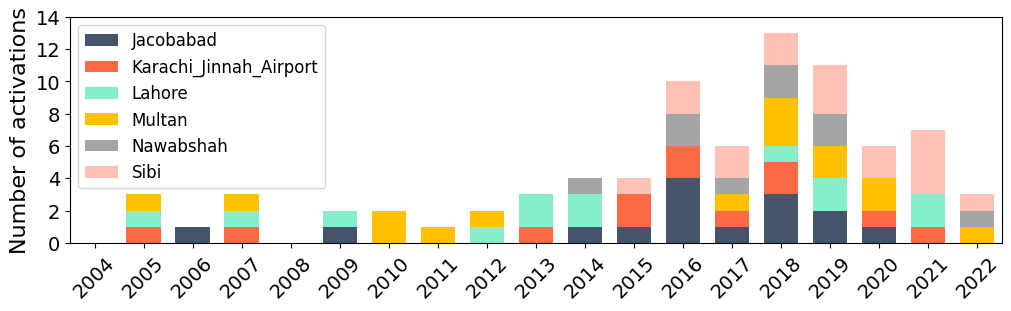

In [65]:
fig, ax = plt.subplots(figsize=(10,3), constrained_layout=True)

# Variable for plotting
width=0.7

# Loop through sites
barPlots=[]
barDatas=[]
for i, site in enumerate(sites):
    barData = triggerYears[site]
    if i==0:
        barPlot = ax.bar(triggerYears.index, barData, width, color=colors[i])
        bottomData = barData
    else:
        barPlot = ax.bar(triggerYears.index, barData, width, bottom=bottomData, color=colors[i])
        bottomData = bottomData+barData
    barPlots.append(barPlot)
    barDatas.append(barData)
    
ax.set_ylabel('Number of activations', fontsize=16)
ax.set_xticks(triggerYears.index, triggerYears.index, rotation=45)
ax.set_yticks(np.arange(0, 15, 2))
ax.legend((barPlot[0] for barPlot in barPlots), (sites), fontsize=12)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(2003.5,2022.5)

plt.show()

## Plot as stacked bar chart, this time limiting each site to max of one activation per year

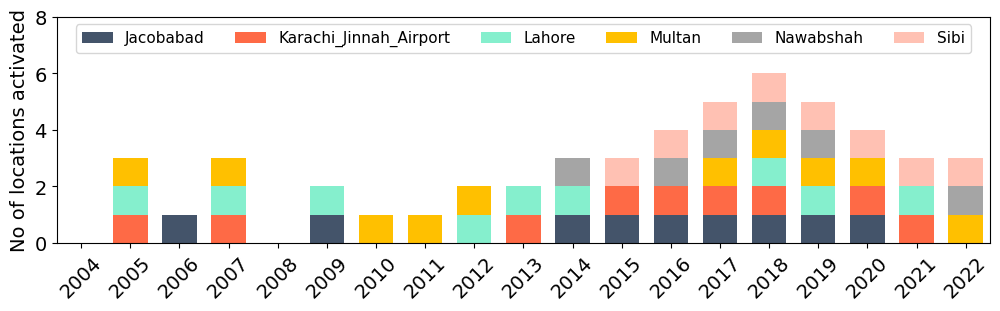

In [66]:
fig, ax = plt.subplots(figsize=(10,3), constrained_layout=True)

# Variable for plotting
width=0.7

# Loop through sites
barPlots=[]
barDatas=[]
for i, site in enumerate(sites):
    barData = triggerYears[site]
    # Set anything above 1 to 1
    barData[barData>1]=1
    if i==0:
        barPlot = ax.bar(triggerYears.index, barData, width, color=colors[i])
        bottomData = barData
    else:
        barPlot = ax.bar(triggerYears.index, barData, width, bottom=bottomData, color=colors[i])
        bottomData = bottomData+barData
    barPlots.append(barPlot)
    barDatas.append(barData)
    
ax.set_ylabel('No of locations activated', fontsize=14)
ax.set_xticks(triggerYears.index, triggerYears.index, rotation=45)
ax.set_yticks(np.arange(0, 9, 2))
ax.legend((barPlot[0] for barPlot in barPlots), (sites), fontsize=11, ncol=len(sites), loc='upper center')
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(2003.5,2022.5)
    
plt.show()